In [1]:
from hyperimpute.plugins.imputers import Imputers, ImputerPlugin
from Impute import fill_with_et
from hyperimpute.plugins.utils.metrics import RMSE

imputers = Imputers()


class EtImputer(ImputerPlugin):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self._model = fill_with_et

    @staticmethod
    def name():
        return "et"

    @staticmethod
    def hyperparameter_space():
        return []

    def _fit(self, *args, **kwargs):
        return self

    def _transform(self, df):
        # 按照缺失值的比例进行排序
        miss_rate = df.isnull().sum() / df.shape[0]
        cols = miss_rate.sort_values().index.tolist()
        cols = [col for col in cols if miss_rate[col] > 0]
        for col in cols:
            df_col_filled = self._model(df, col)
            df[col] = df_col_filled[col]
        return df


imputers.add("et", EtImputer)

hyper = imputers.get("hyperimpute", n_inner_iter=1)
et = imputers.get("et")
missforest = imputers.get("missforest")
gain = imputers.get("gain")
sinkhorn = imputers.get("sinkhorn")
mean = imputers.get("mean")

D:\software\miniconda\Lib\site-packages\pydantic\_internal\_fields.py:149: UserWarning: Field "model_name" has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(


In [2]:
import pandas as pd

df = pd.read_csv("./dataset/PUE.csv")
df

,SSID,ZS_CHS,ZS_R,ZS_log_Tr1K,ZS_log_Tr2K,PMStep,Form_Method,ZS_log_CSArea,ZS_log_StrainRate,ZS_log_PO_MW,...,ZS_SS_MolLogP_norm,ZS_HS_BertzCT,ZS_SS_VSA_EState8,ZS_SS_PEOE_VSA8,ZS_log_HS_NumNHCO_norm,ZS_FC_NumHAcceptors_norm,ZS_FC_RingCount_norm,logEB,logYM,logTS
0,SS1,-0.282081,-0.458469,-1.149486,-0.446448,2,2,-1.236622,-0.293492,0.242956,...,0.185004,-0.805161,0.062210,1.097457,0.732261,0.925153,0.057911,1.187521,1.568202,1.830589
1,SS2,-0.217934,-0.458469,-1.149486,-0.446448,2,2,-1.236622,-0.293492,0.242956,...,0.185004,-0.735945,0.062210,1.097457,0.608139,0.703302,-0.035137,1.176091,1.494155,1.673021
2,SS37,0.340149,-0.458469,0.257284,0.423239,2,4,1.002082,0.121854,-0.229586,...,-1.074003,0.192708,-0.103319,1.075755,-0.152461,0.003757,0.846039,0.824126,1.306425,1.496930
3,SS38,0.981623,-0.458469,0.257284,0.423239,2,4,1.002082,0.121854,-0.229586,...,-1.074003,0.242382,-0.103319,1.075755,-0.201218,-0.191480,1.044842,0.779596,1.892039,1.545307
4,SS39,0.340149,-0.458469,0.546134,0.423239,2,4,1.002082,0.121854,-0.229586,...,-1.074003,-1.390363,-0.103319,1.075755,0.636617,1.100502,-2.066042,0.877947,1.949585,1.429752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,TSS4,1.379337,-0.458469,-0.501172,-0.446448,2,2,-1.236622,0.308492,-0.699793,...,2.332823,0.034878,-1.197146,-1.406137,-0.642782,0.192903,0.089016,0.724276,1.887449,1.492760
322,TSS13,0.666017,-0.458469,-0.039636,-0.577991,2,2,0.754154,0.627557,-0.699793,...,0.004448,0.660688,-0.097646,0.952921,-0.399617,0.697667,0.434875,0.840733,2.207634,1.466868
323,TSS25,-0.586782,1.926609,-0.039636,-0.577991,2,2,0.551581,-0.612557,0.242956,...,0.875190,0.177717,-0.651873,-1.206811,-0.174683,0.287152,0.569582,0.918030,0.810904,1.623249
324,TSS26,-0.464901,1.926609,-0.039636,-0.577991,2,2,0.551581,-0.612557,0.242956,...,0.875190,0.194281,-0.651873,-1.206811,-0.193522,0.207951,0.625250,0.838849,0.845718,1.583199


In [3]:
df = df.drop(columns=['SSID', 'logTS', 'logEB', 'logYM'])
df

,ZS_CHS,ZS_R,ZS_log_Tr1K,ZS_log_Tr2K,PMStep,Form_Method,ZS_log_CSArea,ZS_log_StrainRate,ZS_log_PO_MW,ZS_log_FCVm,ZS_FCCED,ZS_log_Fchi,ZS_SS_TPSA_norm,ZS_SS_MolLogP_norm,ZS_HS_BertzCT,ZS_SS_VSA_EState8,ZS_SS_PEOE_VSA8,ZS_log_HS_NumNHCO_norm,ZS_FC_NumHAcceptors_norm,ZS_FC_RingCount_norm
0,-0.282081,-0.458469,-1.149486,-0.446448,2,2,-1.236622,-0.293492,0.242956,-0.326584,-0.185578,0.469205,-0.557772,0.185004,-0.805161,0.062210,1.097457,0.732261,0.925153,0.057911
1,-0.217934,-0.458469,-1.149486,-0.446448,2,2,-1.236622,-0.293492,0.242956,-0.306909,-0.218766,0.357317,-0.557772,0.185004,-0.735945,0.062210,1.097457,0.608139,0.703302,-0.035137
2,0.340149,-0.458469,0.257284,0.423239,2,4,1.002082,0.121854,-0.229586,-0.521730,0.233243,0.016440,0.204080,-1.074003,0.192708,-0.103319,1.075755,-0.152461,0.003757,0.846039
3,0.981623,-0.458469,0.257284,0.423239,2,4,1.002082,0.121854,-0.229586,-0.877993,0.542964,-0.123056,0.204080,-1.074003,0.242382,-0.103319,1.075755,-0.201218,-0.191480,1.044842
4,0.340149,-0.458469,0.546134,0.423239,2,4,1.002082,0.121854,-0.229586,-0.843088,0.053652,-0.486150,0.204080,-1.074003,-1.390363,-0.103319,1.075755,0.636617,1.100502,-2.066042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,1.379337,-0.458469,-0.501172,-0.446448,2,2,-1.236622,0.308492,-0.699793,-0.898871,0.836772,-0.884773,-3.639947,2.332823,0.034878,-1.197146,-1.406137,-0.642782,0.192903,0.089016
322,0.666017,-0.458469,-0.039636,-0.577991,2,2,0.754154,0.627557,-0.699793,-0.672609,0.459548,-0.023811,-0.360023,0.004448,0.660688,-0.097646,0.952921,-0.399617,0.697667,0.434875
323,-0.586782,1.926609,-0.039636,-0.577991,2,2,0.551581,-0.612557,0.242956,0.189869,0.153501,0.079673,0.833987,0.875190,0.177717,-0.651873,-1.206811,-0.174683,0.287152,0.569582
324,-0.464901,1.926609,-0.039636,-0.577991,2,2,0.551581,-0.612557,0.242956,0.103863,0.193791,0.042658,0.833987,0.875190,0.194281,-0.651873,-1.206811,-0.193522,0.207951,0.625250


In [4]:
from hyperimpute.plugins.utils.simulate import simulate_nan
import numpy as np

# np.random.seed(0)
X = df.drop(labels=[], axis=1)
# reindex
cols = X.columns.tolist()
X = np.array(X)

sim_df = simulate_nan(X, 0.1, mecha="MAR")
X = pd.DataFrame(X, columns=cols)
X_with_nan = sim_df["X_incomp"]
mask = sim_df["mask"]
X_with_nan = pd.DataFrame(X_with_nan, columns=cols)
X_with_nan

,ZS_CHS,ZS_R,ZS_log_Tr1K,ZS_log_Tr2K,PMStep,Form_Method,ZS_log_CSArea,ZS_log_StrainRate,ZS_log_PO_MW,ZS_log_FCVm,ZS_FCCED,ZS_log_Fchi,ZS_SS_TPSA_norm,ZS_SS_MolLogP_norm,ZS_HS_BertzCT,ZS_SS_VSA_EState8,ZS_SS_PEOE_VSA8,ZS_log_HS_NumNHCO_norm,ZS_FC_NumHAcceptors_norm,ZS_FC_RingCount_norm
0,-0.282081,-0.458469,-1.149486,-0.446448,2.0,2.0,-1.236622,-0.293492,0.242956,-0.326584,-0.185578,0.469205,-0.557772,0.185004,-0.805161,0.062210,1.097457,0.732261,0.925153,0.057911
1,-0.217934,-0.458469,-1.149486,-0.446448,2.0,2.0,-1.236622,-0.293492,0.242956,-0.306909,-0.218766,0.357317,NaN,0.185004,-0.735945,0.062210,1.097457,0.608139,0.703302,-0.035137
2,0.340149,-0.458469,0.257284,0.423239,2.0,NaN,1.002082,0.121854,-0.229586,-0.521730,0.233243,0.016440,0.204080,-1.074003,0.192708,-0.103319,1.075755,-0.152461,0.003757,0.846039
3,0.981623,-0.458469,0.257284,0.423239,2.0,4.0,1.002082,0.121854,-0.229586,-0.877993,0.542964,-0.123056,NaN,-1.074003,0.242382,-0.103319,1.075755,-0.201218,-0.191480,1.044842
4,0.340149,-0.458469,0.546134,0.423239,2.0,4.0,1.002082,0.121854,-0.229586,-0.843088,0.053652,-0.486150,0.204080,-1.074003,-1.390363,-0.103319,1.075755,0.636617,1.100502,-2.066042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,1.379337,-0.458469,-0.501172,-0.446448,2.0,2.0,-1.236622,0.308492,-0.699793,-0.898871,0.836772,-0.884773,-3.639947,2.332823,0.034878,-1.197146,-1.406137,-0.642782,0.192903,0.089016
322,0.666017,-0.458469,-0.039636,-0.577991,2.0,2.0,0.754154,0.627557,-0.699793,-0.672609,0.459548,-0.023811,-0.360023,0.004448,0.660688,-0.097646,NaN,-0.399617,0.697667,0.434875
323,-0.586782,1.926609,-0.039636,NaN,2.0,2.0,0.551581,-0.612557,0.242956,0.189869,0.153501,0.079673,0.833987,0.875190,NaN,NaN,-1.206811,-0.174683,0.287152,0.569582
324,NaN,1.926609,-0.039636,NaN,2.0,2.0,0.551581,NaN,0.242956,NaN,0.193791,0.042658,0.833987,0.875190,NaN,NaN,-1.206811,-0.193522,0.207951,0.625250


In [5]:
X_filled_et = et.fit_transform(X_with_nan.copy())
print("RMSE: ", RMSE(X.values, X_filled_et.values, mask))

X_filled_et

RMSE:  0.2574105026978596


,ZS_CHS,ZS_R,ZS_log_Tr1K,ZS_log_Tr2K,PMStep,Form_Method,ZS_log_CSArea,ZS_log_StrainRate,ZS_log_PO_MW,ZS_log_FCVm,ZS_FCCED,ZS_log_Fchi,ZS_SS_TPSA_norm,ZS_SS_MolLogP_norm,ZS_HS_BertzCT,ZS_SS_VSA_EState8,ZS_SS_PEOE_VSA8,ZS_log_HS_NumNHCO_norm,ZS_FC_NumHAcceptors_norm,ZS_FC_RingCount_norm
0,-0.282081,-0.458469,-1.149486,-0.446448,2.0,2.00,-1.236622,-0.293492,0.242956,-0.326584,-0.185578,0.469205,-0.557772,0.185004,-0.805161,0.062210,1.097457,0.732261,0.925153,0.057911
1,-0.217934,-0.458469,-1.149486,-0.446448,2.0,2.00,-1.236622,-0.293492,0.242956,-0.306909,-0.218766,0.357317,-0.557333,0.185004,-0.735945,0.062210,1.097457,0.608139,0.703302,-0.035137
2,0.340149,-0.458469,0.257284,0.423239,2.0,3.98,1.002082,0.121854,-0.229586,-0.521730,0.233243,0.016440,0.204080,-1.074003,0.192708,-0.103319,1.075755,-0.152461,0.003757,0.846039
3,0.981623,-0.458469,0.257284,0.423239,2.0,4.00,1.002082,0.121854,-0.229586,-0.877993,0.542964,-0.123056,0.206273,-1.074003,0.242382,-0.103319,1.075755,-0.201218,-0.191480,1.044842
4,0.340149,-0.458469,0.546134,0.423239,2.0,4.00,1.002082,0.121854,-0.229586,-0.843088,0.053652,-0.486150,0.204080,-1.074003,-1.390363,-0.103319,1.075755,0.636617,1.100502,-2.066042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,1.379337,-0.458469,-0.501172,-0.446448,2.0,2.00,-1.236622,0.308492,-0.699793,-0.898871,0.836772,-0.884773,-3.639947,2.332823,0.034878,-1.197146,-1.406137,-0.642782,0.192903,0.089016
322,0.666017,-0.458469,-0.039636,-0.577991,2.0,2.00,0.754154,0.627557,-0.699793,-0.672609,0.459548,-0.023811,-0.360023,0.004448,0.660688,-0.097646,0.935270,-0.399617,0.697667,0.434875
323,-0.586782,1.926609,-0.039636,-0.545002,2.0,2.00,0.551581,-0.612557,0.242956,0.189869,0.153501,0.079673,0.833987,0.875190,0.182653,-0.645127,-1.206811,-0.174683,0.287152,0.569582
324,-0.421211,1.926609,-0.039636,-0.514141,2.0,2.00,0.551581,-0.585758,0.242956,0.060002,0.193791,0.042658,0.833987,0.875190,0.234884,-0.644535,-1.206811,-0.193522,0.207951,0.625250


In [6]:
X_filled_hyper = hyper.fit_transform(X_with_nan.copy())
print("RMSE: ", RMSE(X.values, X_filled_hyper.values, mask))

X_filled_hyper

RMSE:  0.5116302538184434


,ZS_CHS,ZS_R,ZS_log_Tr1K,ZS_log_Tr2K,PMStep,Form_Method,ZS_log_CSArea,ZS_log_StrainRate,ZS_log_PO_MW,ZS_log_FCVm,ZS_FCCED,ZS_log_Fchi,ZS_SS_TPSA_norm,ZS_SS_MolLogP_norm,ZS_HS_BertzCT,ZS_SS_VSA_EState8,ZS_SS_PEOE_VSA8,ZS_log_HS_NumNHCO_norm,ZS_FC_NumHAcceptors_norm,ZS_FC_RingCount_norm
0,-0.282081,-0.458469,-1.149486,-0.446448,2.0,2.000000,-1.236622,-0.293492,0.242956,-0.326584,-0.185578,0.469205,-0.557772,0.185004,-0.805161,0.062210,1.097457,0.732261,0.925153,0.057911
1,-0.217934,-0.458469,-1.149486,-0.446448,2.0,2.000000,-1.236622,-0.293492,0.242956,-0.306909,-0.218766,0.357317,-0.258596,0.185004,-0.735945,0.062210,1.097457,0.608139,0.703302,-0.035137
2,0.340149,-0.458469,0.257284,0.423239,2.0,3.344157,1.002082,0.121854,-0.229586,-0.521730,0.233243,0.016440,0.204080,-1.074003,0.192708,-0.103319,1.075755,-0.152461,0.003757,0.846039
3,0.981623,-0.458469,0.257284,0.423239,2.0,4.000000,1.002082,0.121854,-0.229586,-0.877993,0.542964,-0.123056,-0.138564,-1.074003,0.242382,-0.103319,1.075755,-0.201218,-0.191480,1.044842
4,0.340149,-0.458469,0.546134,0.423239,2.0,4.000000,1.002082,0.121854,-0.229586,-0.843088,0.053652,-0.486150,0.204080,-1.074003,-1.390363,-0.103319,1.075755,0.636617,1.100502,-2.066042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,1.379337,-0.458469,-0.501172,-0.446448,2.0,2.000000,-1.236622,0.308492,-0.699793,-0.898871,0.836772,-0.884773,-3.639947,2.332823,0.034878,-1.197146,-1.406137,-0.642782,0.192903,0.089016
322,0.666017,-0.458469,-0.039636,-0.577991,2.0,2.000000,0.754154,0.627557,-0.699793,-0.672609,0.459548,-0.023811,-0.360023,0.004448,0.660688,-0.097646,0.779946,-0.399617,0.697667,0.434875
323,-0.586782,1.926609,-0.039636,0.145936,2.0,2.000000,0.551581,-0.612557,0.242956,0.189869,0.153501,0.079673,0.833987,0.875190,0.000449,-0.570798,-1.206811,-0.174683,0.287152,0.569582
324,-0.331910,1.926609,-0.039636,0.197693,2.0,2.000000,0.551581,0.524035,0.242956,0.226676,0.193791,0.042658,0.833987,0.875190,0.161616,-0.610183,-1.206811,-0.193522,0.207951,0.625250


In [7]:
X_filled_missforest = missforest.fit_transform(X_with_nan.copy())
print("RMSE: ", RMSE(X.values, X_filled_missforest.values, mask))

X_filled_missforest

RMSE:  0.49780790020902094


,ZS_CHS,ZS_R,ZS_log_Tr1K,ZS_log_Tr2K,PMStep,Form_Method,ZS_log_CSArea,ZS_log_StrainRate,ZS_log_PO_MW,ZS_log_FCVm,ZS_FCCED,ZS_log_Fchi,ZS_SS_TPSA_norm,ZS_SS_MolLogP_norm,ZS_HS_BertzCT,ZS_SS_VSA_EState8,ZS_SS_PEOE_VSA8,ZS_log_HS_NumNHCO_norm,ZS_FC_NumHAcceptors_norm,ZS_FC_RingCount_norm
0,-0.282081,-0.458469,-1.149486,-0.446448,2.0,2.000000,-1.236622,-0.293492,0.242956,-0.326584,-0.185578,0.469205,-0.557772,0.185004,-0.805161,0.062210,1.097457,0.732261,0.925153,0.057911
1,-0.217934,-0.458469,-1.149486,-0.446448,2.0,2.000000,-1.236622,-0.293492,0.242956,-0.306909,-0.218766,0.357317,-0.277415,0.185004,-0.735945,0.062210,1.097457,0.608139,0.703302,-0.035137
2,0.340149,-0.458469,0.257284,0.423239,2.0,3.318366,1.002082,0.121854,-0.229586,-0.521730,0.233243,0.016440,0.204080,-1.074003,0.192708,-0.103319,1.075755,-0.152461,0.003757,0.846039
3,0.981623,-0.458469,0.257284,0.423239,2.0,4.000000,1.002082,0.121854,-0.229586,-0.877993,0.542964,-0.123056,-0.119614,-1.074003,0.242382,-0.103319,1.075755,-0.201218,-0.191480,1.044842
4,0.340149,-0.458469,0.546134,0.423239,2.0,4.000000,1.002082,0.121854,-0.229586,-0.843088,0.053652,-0.486150,0.204080,-1.074003,-1.390363,-0.103319,1.075755,0.636617,1.100502,-2.066042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,1.379337,-0.458469,-0.501172,-0.446448,2.0,2.000000,-1.236622,0.308492,-0.699793,-0.898871,0.836772,-0.884773,-3.639947,2.332823,0.034878,-1.197146,-1.406137,-0.642782,0.192903,0.089016
322,0.666017,-0.458469,-0.039636,-0.577991,2.0,2.000000,0.754154,0.627557,-0.699793,-0.672609,0.459548,-0.023811,-0.360023,0.004448,0.660688,-0.097646,0.836135,-0.399617,0.697667,0.434875
323,-0.586782,1.926609,-0.039636,0.201987,2.0,2.000000,0.551581,-0.612557,0.242956,0.189869,0.153501,0.079673,0.833987,0.875190,-0.017971,-0.551576,-1.206811,-0.174683,0.287152,0.569582
324,-0.466732,1.926609,-0.039636,0.240896,2.0,2.000000,0.551581,0.490868,0.242956,0.198498,0.193791,0.042658,0.833987,0.875190,0.122131,-0.590960,-1.206811,-0.193522,0.207951,0.625250


In [8]:
X_filled_gain = gain.fit_transform(X_with_nan.copy())
print("RMSE: ", RMSE(X.values, X_filled_gain.values, mask))

X_filled_gain

RMSE:  0.6853209252816321


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.282081,-0.458469,-1.149486,-0.446448,2.0,2.000000,-1.236622,-0.293492,0.242956,-0.326584,-0.185578,0.469205,-0.557772,0.185004,-0.805161,0.062210,1.097457,0.732261,0.925153,0.057911
1,-0.217934,-0.458469,-1.149486,-0.446448,2.0,2.000000,-1.236622,-0.293492,0.242956,-0.306909,-0.218766,0.357317,-0.497514,0.185004,-0.735945,0.062210,1.097457,0.608139,0.703302,-0.035137
2,0.340149,-0.458469,0.257284,0.423239,2.0,2.977178,1.002082,0.121854,-0.229586,-0.521730,0.233243,0.016440,0.204080,-1.074003,0.192708,-0.103319,1.075755,-0.152461,0.003757,0.846039
3,0.981623,-0.458469,0.257284,0.423239,2.0,4.000000,1.002082,0.121854,-0.229586,-0.877993,0.542964,-0.123056,-0.194370,-1.074003,0.242382,-0.103319,1.075755,-0.201218,-0.191480,1.044842
4,0.340149,-0.458469,0.546134,0.423239,2.0,4.000000,1.002082,0.121854,-0.229586,-0.843088,0.053652,-0.486150,0.204080,-1.074003,-1.390363,-0.103319,1.075755,0.636617,1.100502,-2.066042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,1.379337,-0.458469,-0.501172,-0.446448,2.0,2.000000,-1.236622,0.308492,-0.699793,-0.898871,0.836772,-0.884773,-3.639947,2.332823,0.034878,-1.197146,-1.406137,-0.642782,0.192903,0.089016
322,0.666017,-0.458469,-0.039636,-0.577991,2.0,2.000000,0.754154,0.627557,-0.699793,-0.672609,0.459548,-0.023811,-0.360023,0.004448,0.660688,-0.097646,0.145712,-0.399617,0.697667,0.434875
323,-0.586782,1.926609,-0.039636,-0.329668,2.0,2.000000,0.551581,-0.612557,0.242956,0.189869,0.153501,0.079673,0.833987,0.875190,-0.388956,-0.174422,-1.206811,-0.174683,0.287152,0.569582
324,-0.108199,1.926609,-0.039636,0.111208,2.0,2.000000,0.551581,0.197005,0.242956,0.168561,0.193791,0.042658,0.833987,0.875190,0.036476,-0.260195,-1.206811,-0.193522,0.207951,0.625250


In [9]:
# set  X_filled_gain cols
X_filled_gain.columns = X.columns
X_filled_gain

,ZS_CHS,ZS_R,ZS_log_Tr1K,ZS_log_Tr2K,PMStep,Form_Method,ZS_log_CSArea,ZS_log_StrainRate,ZS_log_PO_MW,ZS_log_FCVm,ZS_FCCED,ZS_log_Fchi,ZS_SS_TPSA_norm,ZS_SS_MolLogP_norm,ZS_HS_BertzCT,ZS_SS_VSA_EState8,ZS_SS_PEOE_VSA8,ZS_log_HS_NumNHCO_norm,ZS_FC_NumHAcceptors_norm,ZS_FC_RingCount_norm
0,-0.282081,-0.458469,-1.149486,-0.446448,2.0,2.000000,-1.236622,-0.293492,0.242956,-0.326584,-0.185578,0.469205,-0.557772,0.185004,-0.805161,0.062210,1.097457,0.732261,0.925153,0.057911
1,-0.217934,-0.458469,-1.149486,-0.446448,2.0,2.000000,-1.236622,-0.293492,0.242956,-0.306909,-0.218766,0.357317,-0.497514,0.185004,-0.735945,0.062210,1.097457,0.608139,0.703302,-0.035137
2,0.340149,-0.458469,0.257284,0.423239,2.0,2.977178,1.002082,0.121854,-0.229586,-0.521730,0.233243,0.016440,0.204080,-1.074003,0.192708,-0.103319,1.075755,-0.152461,0.003757,0.846039
3,0.981623,-0.458469,0.257284,0.423239,2.0,4.000000,1.002082,0.121854,-0.229586,-0.877993,0.542964,-0.123056,-0.194370,-1.074003,0.242382,-0.103319,1.075755,-0.201218,-0.191480,1.044842
4,0.340149,-0.458469,0.546134,0.423239,2.0,4.000000,1.002082,0.121854,-0.229586,-0.843088,0.053652,-0.486150,0.204080,-1.074003,-1.390363,-0.103319,1.075755,0.636617,1.100502,-2.066042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,1.379337,-0.458469,-0.501172,-0.446448,2.0,2.000000,-1.236622,0.308492,-0.699793,-0.898871,0.836772,-0.884773,-3.639947,2.332823,0.034878,-1.197146,-1.406137,-0.642782,0.192903,0.089016
322,0.666017,-0.458469,-0.039636,-0.577991,2.0,2.000000,0.754154,0.627557,-0.699793,-0.672609,0.459548,-0.023811,-0.360023,0.004448,0.660688,-0.097646,0.145712,-0.399617,0.697667,0.434875
323,-0.586782,1.926609,-0.039636,-0.329668,2.0,2.000000,0.551581,-0.612557,0.242956,0.189869,0.153501,0.079673,0.833987,0.875190,-0.388956,-0.174422,-1.206811,-0.174683,0.287152,0.569582
324,-0.108199,1.926609,-0.039636,0.111208,2.0,2.000000,0.551581,0.197005,0.242956,0.168561,0.193791,0.042658,0.833987,0.875190,0.036476,-0.260195,-1.206811,-0.193522,0.207951,0.625250


In [10]:
X_filled_sinkhorn = sinkhorn.fit_transform(X_with_nan.copy())

print("RMSE: ", RMSE(X.values, X_filled_sinkhorn.values, mask))


RMSE:  0.42013328068866695


In [11]:
X_filled_sinkhorn.columns = X.columns

X_filled_sinkhorn

,ZS_CHS,ZS_R,ZS_log_Tr1K,ZS_log_Tr2K,PMStep,Form_Method,ZS_log_CSArea,ZS_log_StrainRate,ZS_log_PO_MW,ZS_log_FCVm,ZS_FCCED,ZS_log_Fchi,ZS_SS_TPSA_norm,ZS_SS_MolLogP_norm,ZS_HS_BertzCT,ZS_SS_VSA_EState8,ZS_SS_PEOE_VSA8,ZS_log_HS_NumNHCO_norm,ZS_FC_NumHAcceptors_norm,ZS_FC_RingCount_norm
0,-0.282081,-0.458469,-1.149486,-0.446448,2.0,2.0000,-1.236622,-0.293492,0.242956,-0.326584,-0.185578,0.469205,-0.557772,0.185004,-0.805161,0.062210,1.097457,0.732261,0.925153,0.057911
1,-0.217934,-0.458469,-1.149486,-0.446448,2.0,2.0000,-1.236622,-0.293492,0.242956,-0.306909,-0.218766,0.357317,-0.451930,0.185004,-0.735945,0.062210,1.097457,0.608139,0.703302,-0.035137
2,0.340149,-0.458469,0.257284,0.423239,2.0,3.9069,1.002082,0.121854,-0.229586,-0.521730,0.233243,0.016440,0.204080,-1.074003,0.192708,-0.103319,1.075755,-0.152461,0.003757,0.846039
3,0.981623,-0.458469,0.257284,0.423239,2.0,4.0000,1.002082,0.121854,-0.229586,-0.877993,0.542964,-0.123056,0.208488,-1.074003,0.242382,-0.103319,1.075755,-0.201218,-0.191480,1.044842
4,0.340149,-0.458469,0.546134,0.423239,2.0,4.0000,1.002082,0.121854,-0.229586,-0.843088,0.053652,-0.486150,0.204080,-1.074003,-1.390363,-0.103319,1.075755,0.636617,1.100502,-2.066042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,1.379337,-0.458469,-0.501172,-0.446448,2.0,2.0000,-1.236622,0.308492,-0.699793,-0.898871,0.836772,-0.884773,-3.639947,2.332823,0.034878,-1.197146,-1.406137,-0.642782,0.192903,0.089016
322,0.666017,-0.458469,-0.039636,-0.577991,2.0,2.0000,0.754154,0.627557,-0.699793,-0.672609,0.459548,-0.023811,-0.360023,0.004448,0.660688,-0.097646,0.741847,-0.399617,0.697667,0.434875
323,-0.586782,1.926609,-0.039636,0.679805,2.0,2.0000,0.551581,-0.612557,0.242956,0.189869,0.153501,0.079673,0.833987,0.875190,0.206669,-0.576355,-1.206811,-0.174683,0.287152,0.569582
324,-0.368780,1.926609,-0.039636,0.759154,2.0,2.0000,0.551581,-0.202099,0.242956,0.140006,0.193791,0.042658,0.833987,0.875190,0.256852,-0.570439,-1.206811,-0.193522,0.207951,0.625250


In [15]:
X_filled_mean = mean.fit_transform(X_with_nan.copy())

print("RMSE: ", RMSE(X.values, X_filled_mean.values, mask))

X_filled_mean.columns = X.columns
X_filled_mean

RMSE:  0.9841391957305823


,ZS_CHS,ZS_R,ZS_log_Tr1K,ZS_log_Tr2K,PMStep,Form_Method,ZS_log_CSArea,ZS_log_StrainRate,ZS_log_PO_MW,ZS_log_FCVm,ZS_FCCED,ZS_log_Fchi,ZS_SS_TPSA_norm,ZS_SS_MolLogP_norm,ZS_HS_BertzCT,ZS_SS_VSA_EState8,ZS_SS_PEOE_VSA8,ZS_log_HS_NumNHCO_norm,ZS_FC_NumHAcceptors_norm,ZS_FC_RingCount_norm
0,-0.282081,-0.458469,-1.149486,-0.446448,2.0,2.000000,-1.236622,-0.293492,0.242956,-0.326584,-0.185578,0.469205,-0.557772,0.185004,-0.805161,0.062210,1.097457,0.732261,0.925153,0.057911
1,-0.217934,-0.458469,-1.149486,-0.446448,2.0,2.000000,-1.236622,-0.293492,0.242956,-0.306909,-0.218766,0.357317,-0.104562,0.185004,-0.735945,0.062210,1.097457,0.608139,0.703302,-0.035137
2,0.340149,-0.458469,0.257284,0.423239,2.0,2.739865,1.002082,0.121854,-0.229586,-0.521730,0.233243,0.016440,0.204080,-1.074003,0.192708,-0.103319,1.075755,-0.152461,0.003757,0.846039
3,0.981623,-0.458469,0.257284,0.423239,2.0,4.000000,1.002082,0.121854,-0.229586,-0.877993,0.542964,-0.123056,-0.104562,-1.074003,0.242382,-0.103319,1.075755,-0.201218,-0.191480,1.044842
4,0.340149,-0.458469,0.546134,0.423239,2.0,4.000000,1.002082,0.121854,-0.229586,-0.843088,0.053652,-0.486150,0.204080,-1.074003,-1.390363,-0.103319,1.075755,0.636617,1.100502,-2.066042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,1.379337,-0.458469,-0.501172,-0.446448,2.0,2.000000,-1.236622,0.308492,-0.699793,-0.898871,0.836772,-0.884773,-3.639947,2.332823,0.034878,-1.197146,-1.406137,-0.642782,0.192903,0.089016
322,0.666017,-0.458469,-0.039636,-0.577991,2.0,2.000000,0.754154,0.627557,-0.699793,-0.672609,0.459548,-0.023811,-0.360023,0.004448,0.660688,-0.097646,0.041926,-0.399617,0.697667,0.434875
323,-0.586782,1.926609,-0.039636,0.007782,2.0,2.000000,0.551581,-0.612557,0.242956,0.189869,0.153501,0.079673,0.833987,0.875190,-0.065726,0.061293,-1.206811,-0.174683,0.287152,0.569582
324,-0.151245,1.926609,-0.039636,0.007782,2.0,2.000000,0.551581,0.208494,0.242956,0.101666,0.193791,0.042658,0.833987,0.875190,-0.065726,0.061293,-1.206811,-0.193522,0.207951,0.625250


In [16]:
missing_columns = X_with_nan.columns[X_with_nan.isnull().any()].tolist()
missing_columns

['ZS_CHS',
 'ZS_log_Tr2K',
 'Form_Method',
 'ZS_log_StrainRate',
 'ZS_log_FCVm',
 'ZS_log_Fchi',
 'ZS_SS_TPSA_norm',
 'ZS_HS_BertzCT',
 'ZS_SS_VSA_EState8',
 'ZS_SS_PEOE_VSA8']

In [17]:
col = missing_columns[0]
col_mean = X[col].mean()
col_std = X[col].std()
# 统计在填充前缺失值在一个std距离内的缺失值
col_missing_index = X_with_nan[X_with_nan[col].isnull()].index
col_missing_values = X_with_nan.loc[col_missing_index, col]
original_values = X.loc[col_missing_index, col]
original_values

42     0.388259
43    -0.038321
47    -0.702247
49    -0.525841
52     0.326678
63     1.232439
69     2.181179
88    -1.244293
93    -0.955629
96     2.469843
100    0.186195
102    0.994452
103    0.038656
104   -0.692625
110    0.962379
112   -0.468109
180    0.904646
181    1.764221
182    1.430655
185   -0.577159
191    2.630211
200    1.088749
209   -0.094129
223    1.148406
224    0.667300
233   -0.447582
236   -0.106959
237   -0.627836
251   -1.425188
265   -0.686210
267   -0.699040
279    0.609568
280    0.340149
283    0.789180
288    0.340149
290    0.340149
303   -0.420640
311    0.020053
313    0.981623
317    1.353036
324   -0.464901
Name: ZS_CHS, dtype: float64

et: ZS_CHS score_std: 0.14828001859903292, score_2std: 0.20493020515903468, score_3std: 0.3390523586189174
hyper: ZS_CHS score_std: 0.2918159481829524, score_2std: 0.5535522184292616, score_3std: 1.4147265637692374
missforest: ZS_CHS score_std: 0.34114574908470696, score_2std: 0.572178244317248, score_3std: 1.3979488808641531
gain: ZS_CHS score_std: 0.3583865300648255, score_2std: 0.50494663877909, score_3std: 1.556069038954122
sinkhorn: ZS_CHS score_std: 0.24993687294158548, score_2std: 0.38664148637499374, score_3std: 1.1119845785420248
mean: ZS_CHS score_std: 0.5107067143599853, score_2std: 1.3204825609701332, score_3std: 2.517094512391684
et: ZS_log_Tr2K score_std: 0.231632617714851, score_2std: 0.056025832578993726, score_3std: 0.012575409780656037
hyper: ZS_log_Tr2K score_std: 0.4004267768482159, score_2std: 0.3056154253568937, score_3std: 1.2411017823185577
missforest: ZS_log_Tr2K score_std: 0.4097394805994766, score_2std: 0.29920392075983987, score_3std: 1.2652925766703678
gain

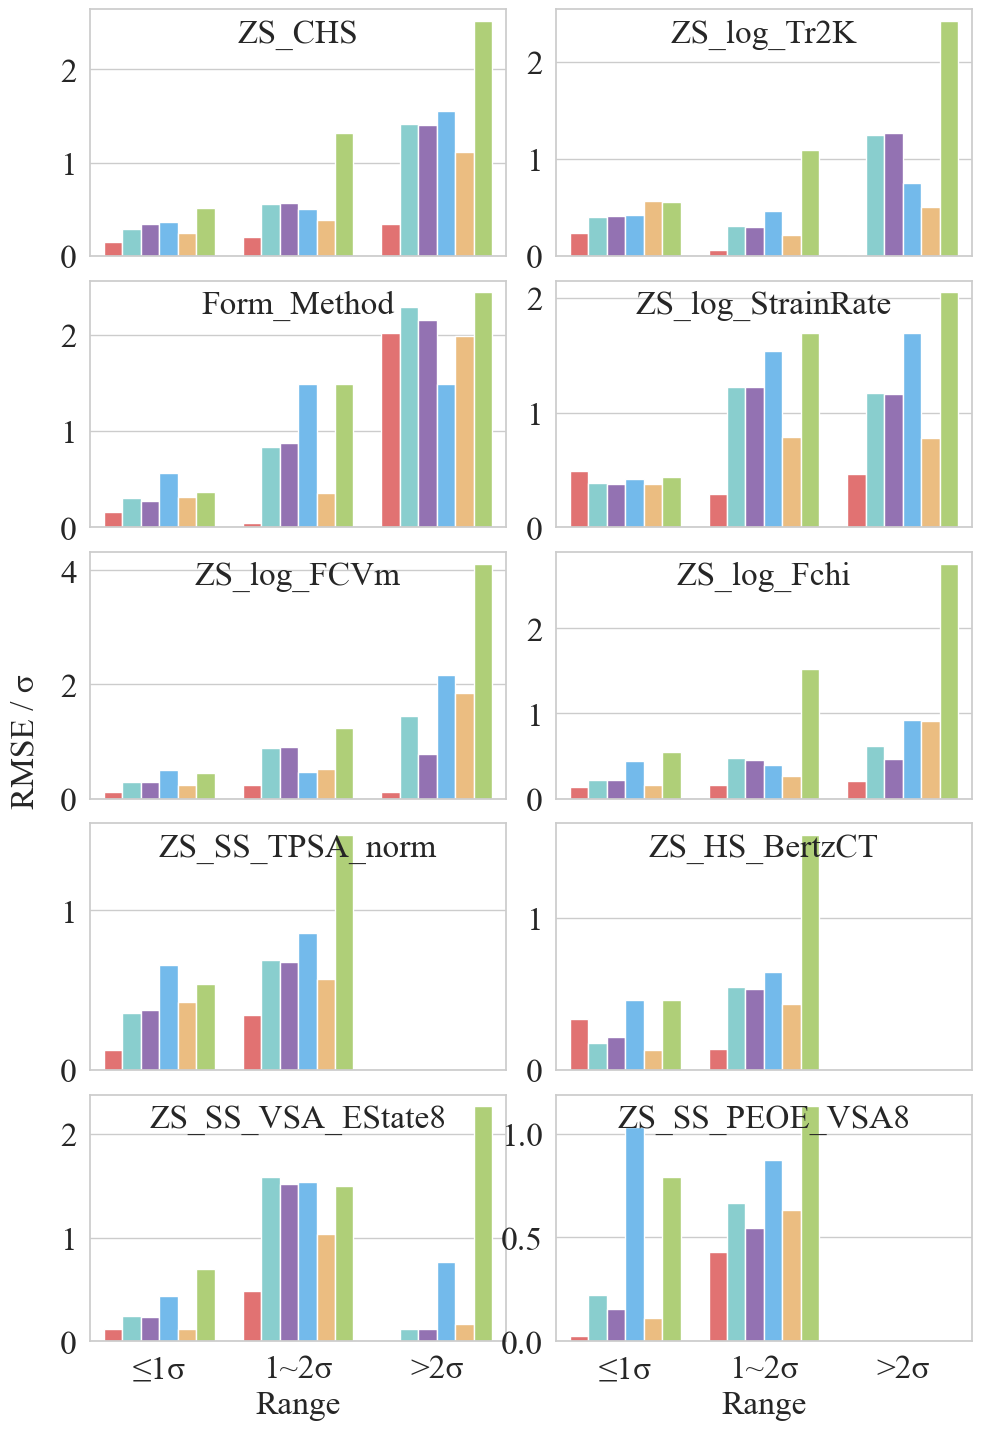

In [18]:
from scipy.stats import skew, kurtosis
import numpy as np
from sklearn.metrics import root_mean_squared_error as rmse
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
sns.set_theme(style="whitegrid")
plt.rcParams["font.family"] = "Times New Roman"
my_palette = sns.color_palette(["#F35F5F", "#7ED9D9", "#9467BD", "#5FBDFF", "#FDBF6F", "#B3DE69", "#FFC0D9"])

cols = 2
rows = len(missing_columns) // cols if len(missing_columns) % cols == 0 else len(missing_columns) // cols + 1
fig, axs = plt.subplots(rows, cols, figsize=(5 * cols, 3 * rows), sharex=True)
axs = axs.flatten()

all_df = pd.DataFrame(columns=["RMSE", "Method", "Range", "Col"])

for col in missing_columns:
    ax = axs[missing_columns.index(col)]
    df = pd.DataFrame(columns=["RMSE", "Method", "Range"])

    col_mean = X[col].mean()
    col_std = X[col].std()
    # 统计在填充前缺失值在一个std距离内的缺失值
    col_missing_index = X_with_nan[X_with_nan[col].isnull()].index
    col_missing_values = X_with_nan.loc[col_missing_index, col]
    original_values = X.loc[col_missing_index, col]
    count = {"1": [], "2": [], "3": []}
    for idx, val in zip(col_missing_index, original_values):
        if abs(val - col_mean) > 2 * col_std:
            count["3"].append(idx)
        elif abs(val - col_mean) > 1 * col_std:
            count["2"].append(idx)
        else:
            count["1"].append(idx)
    col_mean = abs(col_mean)
    score_std = rmse(original_values[count["1"]], X_filled_et.loc[count["1"], col]) / col_std
    score_2std = rmse(original_values[count["2"]], X_filled_et.loc[count["2"], col]) / col_std if len(
        count["2"]) != 0 else np.nan
    score_3std = rmse(original_values[count["3"]], X_filled_et.loc[count["3"], col]) / col_std if len(
        count["3"]) != 0 else np.nan
    print(f"et: {col} score_std: {score_std}, score_2std: {score_2std}, score_3std: {score_3std}")
    df = pd.concat([df, pd.DataFrame({"RMSE": [score_std, score_2std, score_3std],
                                      "Method": ["MatImpute", "MatImpute", "MatImpute"],
                                      "Range": ["≤1σ", "1~2σ", ">2σ"]})], ignore_index=True)

    score_std = rmse(original_values[count["1"]], X_filled_hyper.loc[count["1"], col]) / col_std
    score_2std = rmse(original_values[count["2"]], X_filled_hyper.loc[count["2"], col]) / col_std if len(
        count["2"]) != 0 else np.nan
    score_3std = rmse(original_values[count["3"]], X_filled_hyper.loc[count["3"], col]) / col_std if len(
        count["3"]) != 0 else np.nan
    print(f"hyper: {col} score_std: {score_std}, score_2std: {score_2std}, score_3std: {score_3std}")
    df = pd.concat([df, pd.DataFrame({"RMSE": [score_std, score_2std, score_3std],
                                      "Method": ["HyperImpute", "HyperImpute", "HyperImpute"],
                                      "Range": ["≤1σ", "1~2σ", ">2σ"]})], ignore_index=True)

    score_std = rmse(original_values[count["1"]], X_filled_missforest.loc[count["1"], col]) / col_std
    score_2std = rmse(original_values[count["2"]], X_filled_missforest.loc[count["2"], col]) / col_std if len(
        count["2"]) != 0 else np.nan
    score_3std = rmse(original_values[count["3"]], X_filled_missforest.loc[count["3"], col]) / col_std if len(
        count["3"]) != 0 else np.nan
    print(f"missforest: {col} score_std: {score_std}, score_2std: {score_2std}, score_3std: {score_3std}")
    df = pd.concat([df, pd.DataFrame({"RMSE": [score_std, score_2std, score_3std],
                                      "Method": ["MissForest", "MissForest", "MissForest"],
                                      "Range": ["≤1σ", "1~2σ", ">2σ"]})], ignore_index=True)

    score_std = rmse(original_values[count["1"]], X_filled_gain.loc[count["1"], col]) / col_std
    score_2std = rmse(original_values[count["2"]], X_filled_gain.loc[count["2"], col]) / col_std if len(
        count["2"]) != 0 else np.nan
    score_3std = rmse(original_values[count["3"]], X_filled_gain.loc[count["3"], col]) / col_std if len(
        count["3"]) != 0 else np.nan
    print(f"gain: {col} score_std: {score_std}, score_2std: {score_2std}, score_3std: {score_3std}")
    df = pd.concat([df, pd.DataFrame({"RMSE": [score_std, score_2std, score_3std],
                                      "Method": ["Gain", "Gain", "Gain"],
                                      "Range": ["≤1σ", "1~2σ", ">2σ"]})], ignore_index=True)

    score_std = rmse(original_values[count["1"]], X_filled_sinkhorn.loc[count["1"], col]) / col_std
    score_2std = rmse(original_values[count["2"]], X_filled_sinkhorn.loc[count["2"], col]) / col_std if len(
        count["2"]) != 0 else np.nan
    score_3std = rmse(original_values[count["3"]], X_filled_sinkhorn.loc[count["3"], col]) / col_std if len(
        count["3"]) != 0 else np.nan
    print(f"sinkhorn: {col} score_std: {score_std}, score_2std: {score_2std}, score_3std: {score_3std}")
    df = pd.concat([df, pd.DataFrame({"RMSE": [score_std, score_2std, score_3std],
                                      "Method": ["Sinkhorn", "Sinkhorn", "Sinkhorn"],
                                      "Range": ["≤1σ", "1~2σ", ">2σ"]})], ignore_index=True)

    # mean
    score_std = rmse(original_values[count["1"]], X_filled_mean.loc[count["1"], col]) / col_std
    score_2std = rmse(original_values[count["2"]], X_filled_mean.loc[count["2"], col]) / col_std if len(
        count["2"]) != 0 else np.nan
    score_3std = rmse(original_values[count["3"]], X_filled_mean.loc[count["3"], col]) / col_std if len(
        count["3"]) != 0 else np.nan
    print(f"mean: {col} score_std: {score_std}, score_2std: {score_2std}, score_3std: {score_3std}")
    df = pd.concat([df, pd.DataFrame({"RMSE": [score_std, score_2std, score_3std],
                                      "Method": ["Mean", "Mean", "Mean"],
                                      "Range": ["≤1σ", "1~2σ", ">2σ"]})], ignore_index=True)
    df["Col"] = [col] * df.shape[0]
    all_df = pd.concat([all_df, df], ignore_index=True)

    df.drop(columns=["Col"], inplace=True)

    sns.barplot(x="Range", y="RMSE", hue="Method", data=df, ax=ax, palette=my_palette)
    # del legend
    ax.get_legend().remove()
    # del y label
    ax.set_ylabel("")
    ax.xaxis.set_tick_params(labelsize=24)
    ax.yaxis.set_tick_params(labelsize=24)
    # set x label size
    ax.set_xlabel("Range", fontsize=24)
    # 把标题添加到图的框内
    ax.text(0.5, 0.9, col, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes,
            fontsize=24)

# get legend
handles, labels = ax.get_legend_handles_labels()

# del empty subplot
for i in range(len(missing_columns), len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout()
fig.text(0.02, 0.5, 'RMSE / σ', va='center', rotation='vertical', fontsize=24)
fig.subplots_adjust(hspace=0.1, wspace=0.12, left=0.1, bottom=0.1)
# plt.savefig("std-rmse.png", dpi=300)
all_df.to_excel("std-rmse-pue.xlsx", index=False)